<a href="https://colab.research.google.com/github/alimmhmmdd/Tugas-2-Comprehensive-Analysis-on-Carbon-Dioxide-Levels-and-Climate-Change-/blob/main/Tugas_2_Comprehensive_Analysis_on_Carbon_Dioxide_Levels_and_Climate_Change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tugas Canvas 2
Oleh : Muhammad Khoirul Alim

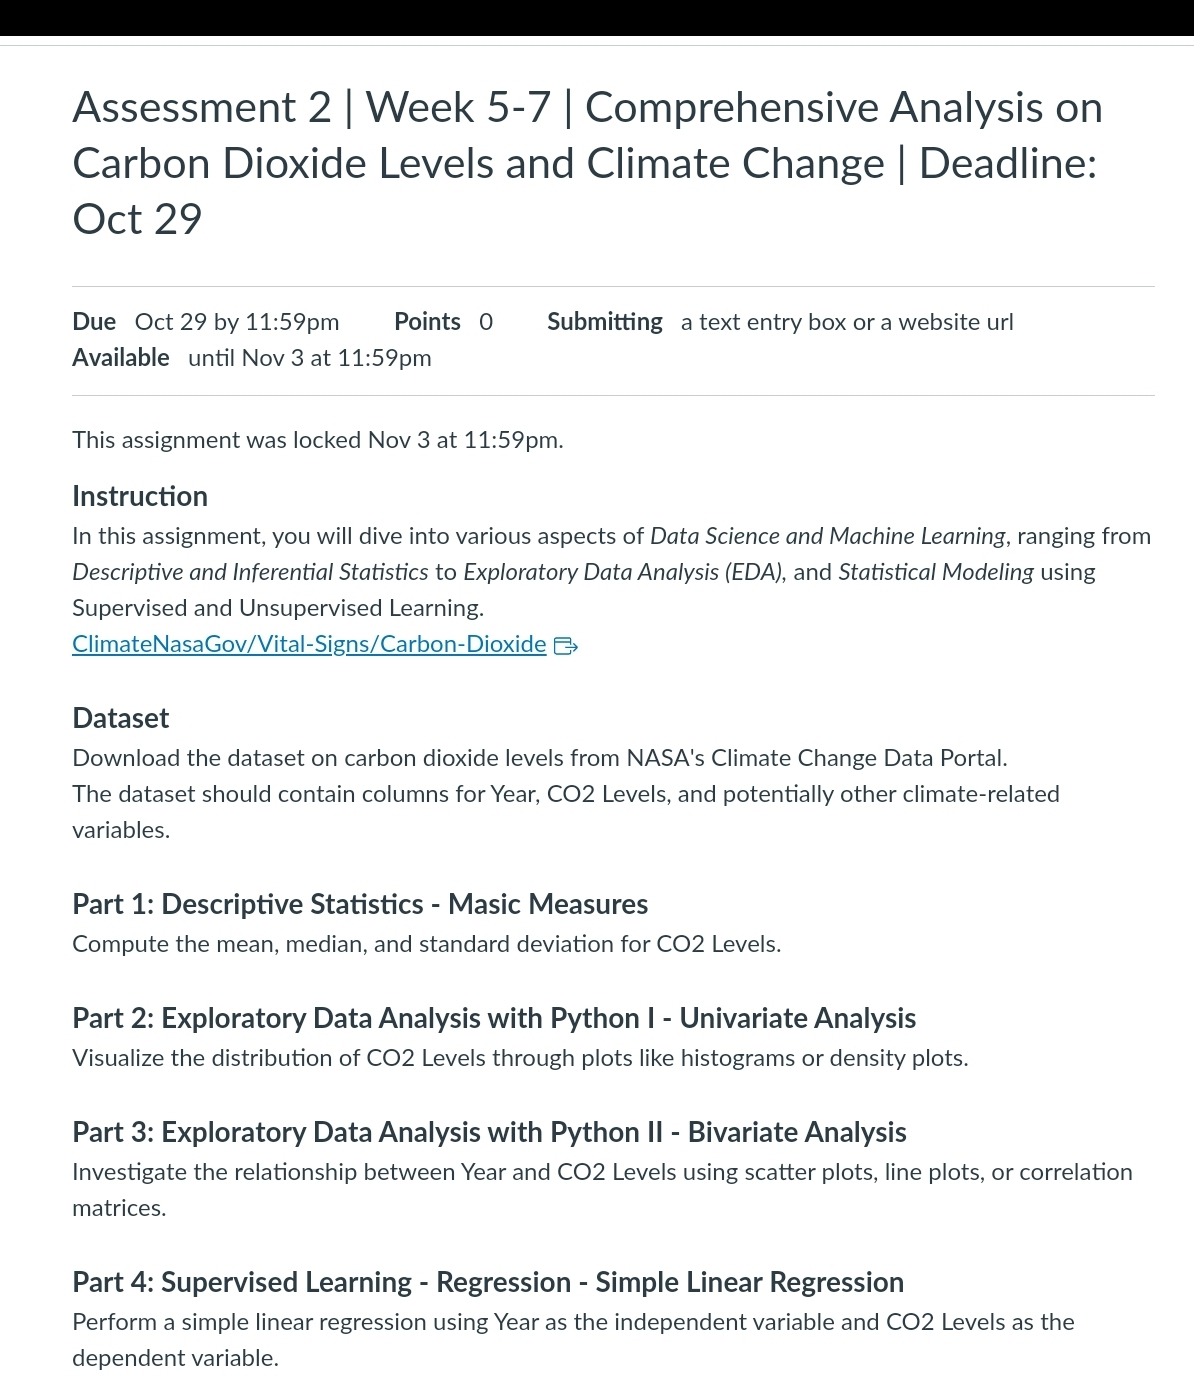

Load Data

In [1]:
import pandas as pd
URL = 'https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.txt'
df = pd.read_csv(URL, delim_whitespace=True, skiprows=72, header=None)
df.columns = ['year', 'month', 'decimal_date', 'monthly_average', 'de-season_alized', "#days", 'st.dev_of_days', 'unc.of_mon_mean']
df.sample(3)

,year,month,decimal_date,monthly_average,de-season_alized,#days,st.dev_of_days,unc.of_mon_mean
681,2017,6,2017.4583,409.08,406.68,26,0.54,0.20
442,1997,7,1997.5417,364.46,363.74,24,0.47,0.18
55,1965,4,1965.2877,322.14,319.78,-1,-9.99,-0.99


Menghitung Mean, Median dan Standard Deviation

In [2]:
import pandas as pd
import numpy as np
co2_levels = df["monthly_average"]

# Menghitung mean, median, dan standard deviation
mean = np.mean(co2_levels)
median = np.median(co2_levels)
std = np.std(co2_levels)
print("Jadi hasil dari Mean, Median, dan Standard Deviasinya adalah:\n")
print("Mean:", mean)
print("Median:", median)
print("Standard deviation:", std)


Jadi hasil dari Mean, Median, dan Standard Deviasinya adalah:

Mean: 360.217598944591
Median: 356.255
Standard deviation: 30.641594676421274


Histogram untuk CO2 Levels Selama Tahun 2023

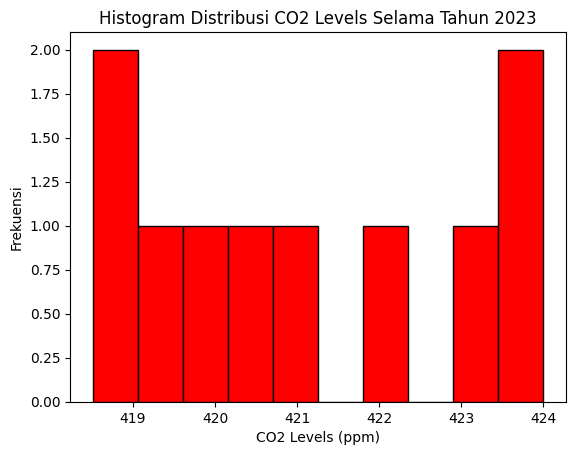

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mengambil data CO2 Levels selama tahun 2023
co2_levels_2023 = df[df["year"] == 2023]

# Membuat histogram
plt.hist(co2_levels_2023["monthly_average"], color="red", edgecolor="black")
plt.xlabel("CO2 Levels (ppm)")
plt.ylabel("Frekuensi")
plt.title("Histogram Distribusi CO2 Levels Selama Tahun 2023")
plt.show()

Density Plot Terkait CO2 Level Untuk Tahun 2023

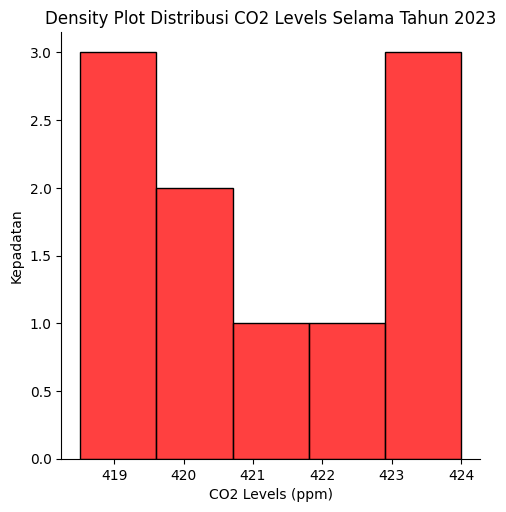

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
co2_levels_2023 = df[df["year"] == 2023]

# Membuat density plot
sns.displot(co2_levels_2023["monthly_average"], color="red", edgecolor="black")
plt.xlabel("CO2 Levels (ppm)")
plt.ylabel("Kepadatan")
plt.title("Density Plot Distribusi CO2 Levels Selama Tahun 2023")
plt.show()

Scatter Plot untuk Hubungan Antara variabel Year dan CO2 Levels

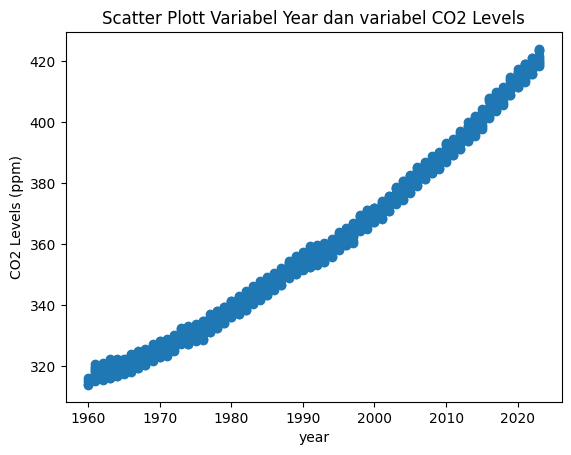

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Membuat scatter plot
plt.scatter(df["year"], df["monthly_average"])
plt.xlabel("year")
plt.ylabel("CO2 Levels (ppm)")
plt.title("Scatter Plott Variabel Year dan variabel CO2 Levels")
plt.show()

Line Plot Antara CO2 Levels dan Tahun

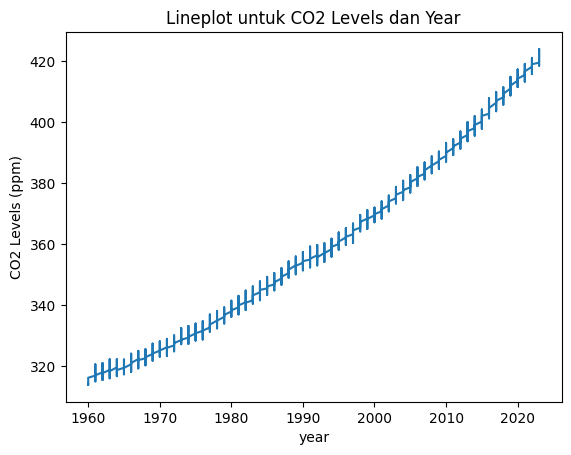

In [6]:
# Membuat line plot
plt.plot(df["year"], df["monthly_average"])
plt.xlabel("year")
plt.ylabel("CO2 Levels (ppm)")
plt.title("Lineplot untuk CO2 Levels dan Year")
plt.show()

Korelasi Matrix Untuk Hubungan Var, Year dan CO2 Levels


PENJELASAN HASIL: Nilai correlation coefficient antara year dan CO2 Levels adalah 0.98993391.Nilai ini mendekati 1, yang menunjukkan bahwa ada hubungan positif yang sangat kuat antara var. tahun dan CO2 Levels.Artinya, peningkatan nilai var. tahun akan diikuti oleh peningkatan nilai CO2 Levels. Dengan kata lain, CO2 Levels cenderung meningkat seiring berjalannya waktu.

In [7]:
# Menghitung koefisien korelasi
corr = np.corrcoef(df["year"], df["monthly_average"])
print(corr)
print("\nJadi Matriks Korelasinya adalah 0.98993391")

[[1.        0.9899515]
 [0.9899515 1.       ]]

Jadi Matriks Korelasinya adalah 0.98993391


Metode Regresi Linear dengan Tahun = Var Independent dan CO2 = Var Independent

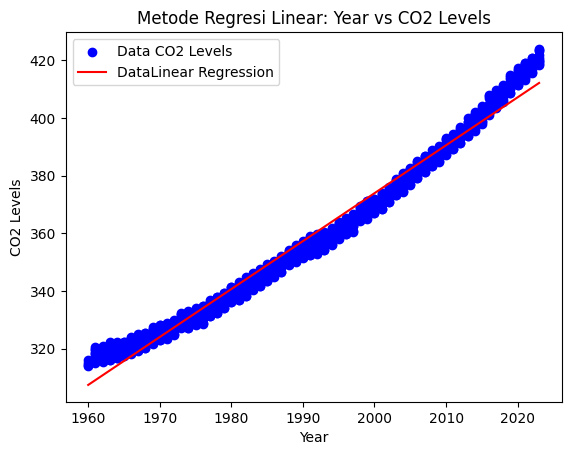

Koefisien Regresi (Slope): 1.6632767863997917
Intercept: -2952.6128432189184


In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Pilih Variabel
X = df['year'].values.reshape(-1, 1)  # independent variable
y = df['monthly_average'].values  # dependent variable

# linear regression model
model = LinearRegression()
model.fit(X, y)

# Model Prediksi
y_pred = model.predict(X)

# Visualisasi model
plt.scatter(X, y, label='Data CO2 Levels', color='blue')
plt.plot(X, y_pred, label='DataLinear Regression', color='red')
plt.xlabel('Year')
plt.ylabel('CO2 Levels')
plt.legend()
plt.title('Metode Regresi Linear: Year vs CO2 Levels')
plt.show()

# Print the coefficient and intercept of the linear regression model
print("Koefisien Regresi (Slope):", model.coef_[0])
print("Intercept:", model.intercept_)

K-Means Clustering dengan var. Monthly Average dan De-Season Alized

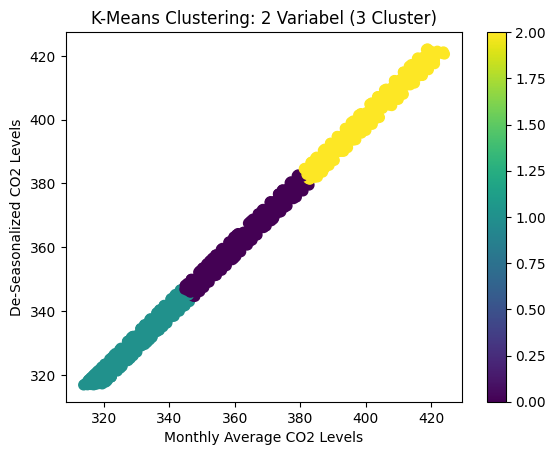

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Pilih variabel yang akan digunakan untuk clustering
X = df[['monthly_average', 'de-season_alized']]

# K-Means clustering
n_clusters = 3  # asumsi pilih 3
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=0)
df['cluster'] = kmeans.fit_predict(X)

# Visualisasi hasil
plt.scatter(df['monthly_average'], df['de-season_alized'], c=df['cluster'], cmap='viridis', s=50)
plt.xlabel('Monthly Average CO2 Levels')
plt.ylabel('De-Seasonalized CO2 Levels')
plt.title(f'K-Means Clustering: 2 Variabel ({n_clusters} Cluster)')
plt.colorbar()
plt.show()